Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 

Reading csv files

In [2]:
data = pd.read_csv("FuelConsumptionCo2.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Analyzing the problem statement. Selecting Features to conduct prediction.

Here our goal is to predict the value of “co2 emissions” from the value of “engine size” in our dataset.

In [3]:
data = data[["ENGINESIZE","CO2EMISSIONS"]]


PLOT DARA FOR BETTER VISUALIZATION

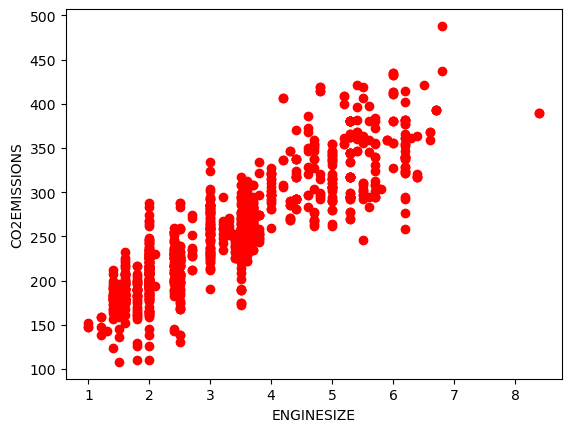

In [4]:
plt.scatter(data["ENGINESIZE"],data["CO2EMISSIONS"],color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

Divide data into training and testing data

In [5]:
train_data = data[:(int((len(data)*0.8)))] # 80 % data to train
test_data = data[(int((len(data)*0.8))):] # 20 % data to test

Training our model:


In [6]:
from sklearn import linear_model 
regr = linear_model.LinearRegression()

train_x = np.array(train_data[["ENGINESIZE"]])
train_y = np.array(train_data[["CO2EMISSIONS"]])

regr.fit(train_x,train_y) # fit line
print("Coefficients : ",regr.coef_)
print("Intercept : ",regr.intercept_)


Coefficients :  [[38.79512384]]
Intercept :  [127.16989951]


Plot the best fit line

Text(0, 0.5, 'EMISSIONS')

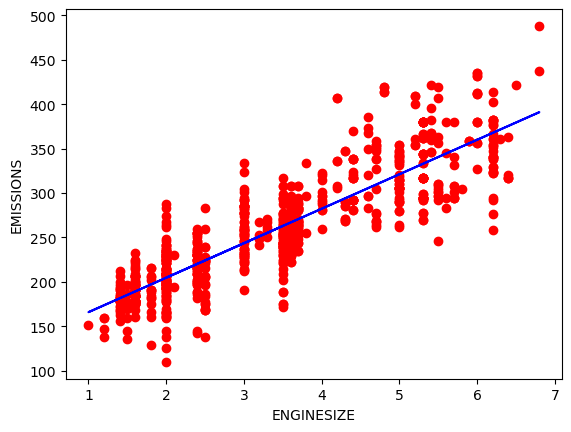

In [7]:
plt.scatter(train_data["ENGINESIZE"],train_data["CO2EMISSIONS"],color="red")
plt.plot(train_x,regr.coef_*train_x+regr.intercept_,'-b')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")


Predicting Function for Dataset

In [8]:
def linear_regression_function(features,intercept,slope):
  predicted_values = features*slope + intercept
  return predicted_values

Predicting CO2 Emission for future cars


In [13]:
curr_engine_size = 4.5

predicted_emission = linear_regression_function(curr_engine_size,regr.intercept_[0],regr.coef_[0][0])
print("Predicted Emission : ",predicted_emission)

Predicted Emission :  301.74795677107386


Accuracy of the test data

In [10]:
from sklearn.metrics import r2_score

test_x = np.array(test_data[["ENGINESIZE"]])
test_y = np.array(test_data[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ -test_y)))
print("Mean sum of squares (MSE): %.2f" % np.mean((test_y_ -test_y) ** 2))
print("R2-score: %.2f"  % r2_score(test_y_ , test_y) )

Mean absolute error: 20.60
Mean sum of squares (MSE): 746.45
R2-score: 0.71
